# 流行库/模型实践

## 自然语言处理包（NLTK）

## XGBoost 模型

提升（Boosting）分类器，属于集成学习模型，基本思想是把成千上万个分类准确率较低的树模型组合起来，成为一个准确率很高的模型。这个模型的特点在于不断迭代，每次迭代就生成一颗新的树。对于如何在每一步生成合理的树，大家提出了很多的方法，比如我们在集成（分类）模型中提到的梯度提升树（Gradient Tree Boosting）。它在生成每一颗树的时候采用梯度下降的思想，以之前生成的所有决策树为基础，向着最小化给定目标函数的方向再进一步。  
XGBoost最大的特点在于能自动利用cpu的多线程进行并行。

In [5]:
# 使用XGBoost模型，根据titanic的乘客数据上进行生还者预测
import pandas as pd
titanic = pd.read_csv("http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt")

# 选取pclass/age以及sex作为训练特征
x = titanic[['pclass', 'age', 'sex']]
y = titanic['survived']

In [7]:
# 对缺失的数据进行处理
x['age'].fillna(x['age'].mean())

# 数据集分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)

In [8]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)

In [9]:
# 对原数据进行处理
x_train = vec.fit_transform(x_train.to_dict(orient='record'))
x_test = vec.transform(x_test.to_dict(orient='record'))

In [10]:
# 采用默认配置的随机森林分类器对测试集进行预测
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
print(rfc.score(x_test, y_test))

0.781155015198


In [11]:
# 采用默认配置的XGBoost模型对相同的测试集进行预测
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [12]:
print(xgbc.score(x_test, y_test))

0.787234042553


XGBoost之所以这么有名，更是因为该模型在多项数据分析竞赛中帮助选手取得名次。

## Tensorflow框架

Tensorflow是一个完整的编码系统

Tensorflow使用图（Graph）来表示计算任务；使用会话（Session）来执行图。

In [1]:
# 使用Tensorflow输出一句话
import tensorflow as tf
import numpy as np
# 初始化一个Tensorflow的常量
greating = tf.constant('Hello Google Tensorflow!')
# 启动一个会话
sess = tf.Session()
# 用会话执行greeting计算模块
result = sess.run(greating)
print(result)
# 关闭会话
sess.close()

b'Hello Google Tensorflow!'


In [2]:
# 使用tensorflow完成一次线性函数的计算
matrix1 = tf.constant([[3., 3.]])  # 1*2的行向量
matrix2 = tf.constant([[2.], [2.]])  # 2*1的列向量

product = tf.matmul(matrix1, matrix2)  # 两个向量相乘

linear = tf.add(product, tf.constant(2.0))

# 直接在会话中执行linear算例，相当于将上面所有的单独算例拼接成流程图来执行
with tf.Session() as sess:
    result = sess.run(linear)
    print(result)

[[ 14.]]


In [4]:
# 使用tensorflow自定义一个线性分类器用于良/恶性乳腺癌肿瘤进行预测
import pandas as pd

# 从本地使用pandas导入数据集
train = pd.read_csv("../Datasets/Breast-Cancer/breast-cancer-train.csv")
test = pd.read_csv("../Datasets/Breast-Cancer/breast-cancer-test.csv")

# 分隔特征与分类目标
x_train = np.float32(train[['Clump Thickness', 'Cell Size']].T)
y_train = np.float32(train['Type'].T)
x_test = np.float32(test[['Clump Thickness', 'Cell Size']].T)
y_test = np.float32(test['Type'].T)

# 定义一个tensorflow的变量b作为线性模型的截距，同时设置初始值为1.0
b = tf.Variable(tf.zeros([1]))

# 定义一个tensorflow的变量W作为线性模型的系数，并设置初始值为-1.0至1.0之间均匀分布的随机数
w = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))

# 显式定义这个线性函数
y = tf.matmul(w, x_train) + b

# 使用tensorflow 中的reduce_mean 取得训练集上均方误差
loss = tf.reduce_mean(tf.square(y - y_train))

# 使用梯度下降法估计参数w, b并且设置迭代步长为0.01，这个与scikit-learn中的SGDRegressor类似
optimizer = tf.train.GradientDescentOptimizer(0.01)

# 以最小二乘损失为优化目标
train = optimizer.minimize(loss)

# 初始化所有变量
init = tf.global_variables_initializer()  # 新的初始化方式

# 开启tensorflow中的会话
sess = tf.Session()

# 执行变量初始化操作
sess.run(init)

# 迭代1000轮次，训练参数
for step in range(0, 1000):
    sess.run(train)
    if step % 200 == 0:
        print(step, sess.run(w), sess.run(b))

0 [[ 0.37616724  0.11273295]] [-0.10297316]
200 [[ 0.0651051   0.07089093]] [-0.09042189]
400 [[ 0.05820862  0.07714812]] [-0.08727959]
600 [[ 0.05787529  0.0774192 ]] [-0.08694174]
800 [[ 0.05786001  0.07742623]] [-0.08689421]


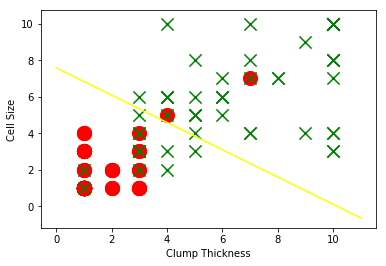

In [5]:
# 准备测试样本
test_negative = test.loc[test['Type'] == 0][['Clump Thickness', 'Cell Size']]
test_positive = test.loc[test['Type'] == 1][['Clump Thickness', 'Cell Size']]

# 以最终更新的参数作图
import matplotlib.pyplot as plt
plt.scatter(test_negative['Clump Thickness'], test_negative['Cell Size'], marker='o', s=200, c='red')
plt.scatter(test_positive['Clump Thickness'], test_positive['Cell Size'], marker='x', s=150, c='green')

plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

lx = np.arange(0, 12)

# 这里强调一下，我们以0.5作为分界面，计算如下
ly = (0.5 - sess.run(b) - lx * sess.run(w)[0][0]) / sess.run(w)[0][1]

plt.plot(lx, ly, color='yellow')
plt.show()